<a href="https://colab.research.google.com/github/Ammon1/Math/blob/master/noise_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
#from keras.layers import 
import tensorflow as tf
from keras import backend as K


import xgboost as xgb

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
path='/content/drive/MyDrive/fizyka/ftir_noise/'
arr = os.listdir(path)

In [33]:
i=0
j=0
for file in arr:
    if 'dpt' in file:
       #pomair dokladny
       if '100sc' in file and 'bcg'not in file and 'MIR' in file:
           globals()['df_Y']=pd.read_csv(path+file,sep=',')
       #pomiar niedokladny
       elif '1sc' in file and 'bcg' not in file and 'MIR' in file:    
           print('i ',i)
           globals()['df'+str(i)]=pd.read_csv(path+file,sep=',')
           i=i+1
      #pomiar tla
       elif '1sc' in file and 'bcg' in file and 'MIR' in file:  
           print('bck j ',j)
           globals()['df_bg'+str(j)]=pd.read_csv(path+file,sep=',')
           j=j+1

bck j  0
bck j  1
bck j  2
bck j  3
bck j  4
i  0
i  1
i  2
i  3
i  4
i  5
i  6
bck j  5


In [34]:
Y_0=df_Y.iloc[:,1].values

X_0=np.hstack((
            df1.iloc[:,1],
            df2.iloc[:,1],
            df3.iloc[:,1],
            df4.iloc[:,1],
            df5.iloc[:,1],))

X_01=np.arange(0,df_Y.iloc[:,1].shape[0])
X_02=np.power(X_01,2)
X_03=np.power(X_01,3)

X0=df_bg0.iloc[:,1].values
X1=df_bg1.iloc[:,1].values
X2=df_bg2.iloc[:,1].values
X3=df_bg3.iloc[:,1].values
X4=df_bg4.iloc[:,1].values
X5=df_bg5.iloc[:,1].values


X_1=np.tile(X1,int(X_0.shape[0]/Y_0.shape[0]))
X_2=np.tile(X2,int(X_0.shape[0]/Y_0.shape[0]))
X_3=np.tile(X3,int(X_0.shape[0]/Y_0.shape[0]))
X_4=np.tile(X4,int(X_0.shape[0]/Y_0.shape[0]))
X_5=np.tile(X5,int(X_0.shape[0]/Y_0.shape[0]))
X_8=np.tile(X_01,int(X_0.shape[0]/Y_0.shape[0]))
X_9=np.tile(X_02,int(X_0.shape[0]/Y_0.shape[0]))
X_10=np.tile(X_03,int(X_0.shape[0]/Y_0.shape[0]))

Y=np.tile(Y_0,int(X_0.shape[0]/Y_0.shape[0]))
X=np.vstack((X_0,X_1,X_2,X_3,X_4,X_5,X_8,X_9,X_10))

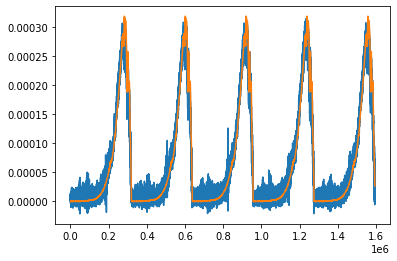

In [44]:
plt.plot(X[0,:])
plt.plot(Y/60)

In [45]:
i=0
j=0
for file in arr:
    if 'dpt' in file:
       #pomair dokladny
       if '100sc' in file and 'bcg'not in file and '541' in file:
           globals()['df_Y']=pd.read_csv(path+file,sep=',')
       #pomiar niedokladny
       elif '10sc' in file and 'bcg' not in file and '541' in file:    
           print('i ',i)
           globals()['df'+str(i)]=pd.read_csv(path+file,sep=',')
           i=i+1

i  0
i  1
i  2
i  3
i  4
i  5


In [46]:
Y_0=df_Y.iloc[:,1].values

X_0=np.hstack((
            df1.iloc[:,1],
            df2.iloc[:,1],
            df3.iloc[:,1],
            df4.iloc[:,1],
            df5.iloc[:,1]))
Y1=np.tile(Y_0,int(X_0.shape[0]/Y_0.shape[0]))
X1=np.vstack((X_0,X_1,X_2,X_3,X_4,X_5,X_8,X_9,X_10))

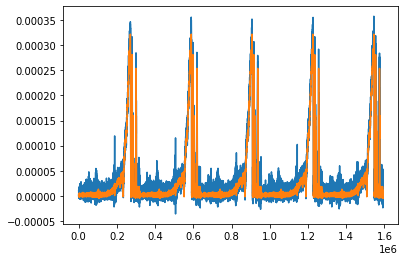

In [47]:
plt.plot(X1[0,:])
plt.plot(Y1)

In [51]:
i=0
j=0
for file in arr:
    if 'dpt' in file:
       #pomair dokladny
       if '100AC' in file and 'bcg'not in file and '4734' in file:
           globals()['df_Y']=pd.read_csv(path+file,sep=',')
       #pomiar niedokladny
       elif '2AC' in file and 'bcg' not in file and '4734' in file:    
           print('i ',i)
           globals()['df'+str(i)]=pd.read_csv(path+file,sep=',')
           i=i+1

i  0
i  1
i  2
i  3
i  4


In [55]:
Y_0=df_Y.iloc[:,1].values

X_0=np.hstack((
            df0.iloc[:,1],
            df1.iloc[:,1],
            df2.iloc[:,1],
            df3.iloc[:,1],
            df4.iloc[:,1],
            ))
Y2=np.tile(Y_0,int(X_0.shape[0]/Y_0.shape[0]))
X2=np.vstack((X_0,X_1,X_2,X_3,X_4,X_5,X_8,X_9,X_10))

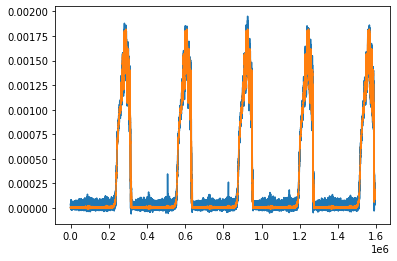

In [56]:
plt.plot(X2[0,:])
plt.plot(Y2)

In [57]:
i=0
j=0
for file in arr:
    if 'dpt' in file:
       #pomair dokladny
       if '100AC' in file and 'bcg'not in file and 'H67' in file:
           globals()['df_Y']=pd.read_csv(path+file,sep=',')
       #pomiar niedokladny
       elif '1AC' in file and 'bcg' not in file and 'H67' in file:    
           print('i ',i)
           globals()['df'+str(i)]=pd.read_csv(path+file,sep=',')
           i=i+1

i  0
i  1
i  2
i  3
i  4


In [60]:
Y_0=df_Y.iloc[:,1].values

X_0=np.hstack((
            df0.iloc[:,1],
            df1.iloc[:,1],
            df2.iloc[:,1],
            df3.iloc[:,1],
            df4.iloc[:,1],
            ))
Y3=np.tile(Y_0,int(X_0.shape[0]/Y_0.shape[0]))
X3=np.vstack((X_0,X_1,X_2,X_3,X_4,X_5,X_8,X_9,X_10))

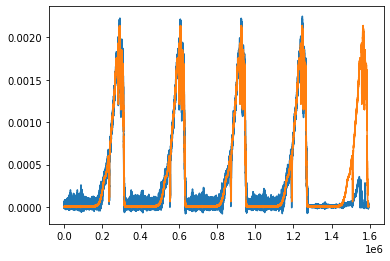

In [61]:
plt.plot(X3[0,:])
plt.plot(Y3)

In [62]:
def import_files(sample,ac_big,ac_small,number):#H67, 100AC,1AC,3
  i=0
  j=0
  for file in arr:
      if 'dpt' in file:
        #pomair dokladny
        if ac_big in file and sample in file:
            globals()['df_Y']=pd.read_csv(path+file,sep=',')
        #pomiar niedokladny
        elif ac_small in file and sample in file:    
            print('i ',i)
            globals()['df'+str(i)]=pd.read_csv(path+file,sep=',')
            i=i+1
  Y_0=df_Y.iloc[:,1].values

  X_0=np.hstack((
              df0.iloc[:,1],
              df1.iloc[:,1],
              df2.iloc[:,1],
              df3.iloc[:,1],
              df4.iloc[:,1],
              ))
  globals()['Y'+number]=np.tile(Y_0,int(X_0.shape[0]/Y_0.shape[0]))
  globals()['X'+number]=np.vstack((X_0,X_1,X_2,X_3,X_4,X_5,X_8,X_9,X_10))

  plt.plot(X3[0,:])
  plt.plot(Y3)
  return X3,Y3

In [63]:
print(X3.shape)

(9, 1592890)


i  0
i  1
i  2
i  3
i  4


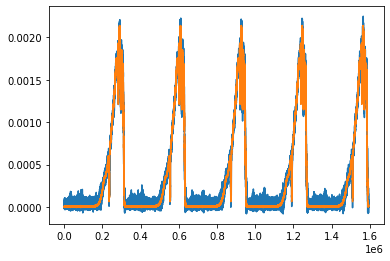

In [64]:
X3,Y3=import_files('H67','100AC','1AC','3')

In [65]:
print(X3.shape)

(9, 1592890)


In [39]:
print(X.shape)
print(X1.shape)
print(X2.shape)
print(X3.shape)
print(Y.shape)

(9, 1592890)
(318578,)
(318578,)
(318578,)
(1592890,)


In [29]:
X=np.transpose(X)
X1=np.transpose(X1)
X2=np.transpose(X2)
X3=np.transpose(X3)

In [30]:
X_fin=np.vstack((X,X1,X2,X3))
Y_fin=np.hstack((Y/60,Y1,Y2,Y3))

In [40]:
plt.plot(X1[:,0])
plt.plot(Y)

IndexError: ignored

In [ ]:
print(X_fin.shape)
print(Y_fin.shape)

(3185780, 9)
(3185780,)


In [ ]:
scalerX = StandardScaler()
scalerY = StandardScaler()
X_fin=scalerX.fit_transform(X_fin)
Y_fin=Y_fin.reshape(-1,1)
Y_fin=scalerY.fit_transform(Y_fin)

In [ ]:
X_train,y_train=X_fin[:9*Y_0.shape[0],:],Y_fin[:9*Y_0.shape[0]]
X_test,y_test=X_fin[9*Y_0.shape[0]:10*Y_0.shape[0],:],Y_fin[9*Y_0.shape[0]:10*Y_0.shape[0]]

In [ ]:
print(X_test.shape)
print(X_train.shape)

(318578, 9)
(2867202, 9)


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

0.8827199750228502
-847.2419478911179


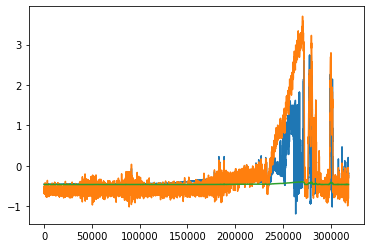

In [ ]:
print(xg_reg.score(X_train,y_train))
print(xg_reg.score(X_test,y_test))
plt.plot(xg_reg.predict(X_test))
plt.plot(X_test[:,0])
plt.plot(y_test)

In [ ]:

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Epoch 1/100
2868/2868 - 11s - loss: 0.2505 - mse: 0.2505 - mae: 0.2449 - val_loss: 0.2636 - val_mse: 0.2636 - val_mae: 0.2051
Epoch 2/100
2868/2868 - 10s - loss: 0.1644 - mse: 0.1644 - mae: 0.1735 - val_loss: 0.2255 - val_mse: 0.2255 - val_mae: 0.1651
Epoch 3/100
2868/2868 - 11s - loss: 0.1451 - mse: 0.1451 - mae: 0.1515 - val_loss: 0.1802 - val_mse: 0.1802 - val_mae: 0.1408
Epoch 4/100
2868/2868 - 11s - loss: 0.1369 - mse: 0.1369 - mae: 0.1420 - val_loss: 0.1818 - val_mse: 0.1818 - val_mae: 0.1385
Epoch 5/100
2868/2868 - 11s - loss: 0.1318 - mse: 0.1318 - mae: 0.1364 - val_loss: 0.2158 - val_mse: 0.2158 - val_mae: 0.1525
Epoch 6/100
2868/2868 - 11s - loss: 0.1279 - mse: 0.1279 - mae: 0.1324 - val_loss: 0.1958 - val_mse: 0.1958 - val_mae: 0.1401
Epoch 7/100
2868/2868 - 11s - loss: 0.1246 - mse: 0.1246 - mae: 0.1292 - val_loss: 0.2068 - val_mse: 0.2068 - val_mae: 0.1492
Epoch 8/100
2868/2868 - 11s - loss: 0.1216 - mse: 0.1216 - mae: 0.1265 - val_loss: 0.2137 - val_mse: 0.2137 - val_mae:

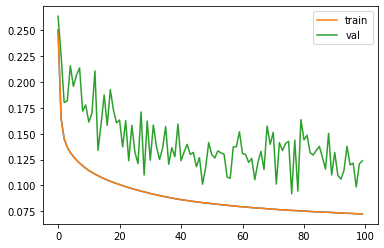

In [ ]:
optimizer =tf.keras.optimizers.RMSprop(
    learning_rate=0.0001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=True,
    name='RMSprop',)
model = Sequential()
model.add(Dense(128, input_dim=9,activation='relu',kernel_initializer='he_uniform'))#dim
model.add(Dense(64, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=optimizer, metrics=['mse','mae'])
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=1000,verbose=2)
plt.plot(history.history['mse'])
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=1, batch_size=1000,verbose=2)

2868/2868 - 7s - loss: 0.0690 - mse: 0.0690 - mae: 0.0824 - val_loss: 0.1373 - val_mse: 0.1373 - val_mae: 0.0953


In [ ]:
y_predict=model.predict(X_test)

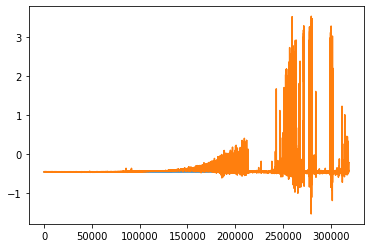

In [ ]:
plt.plot(y_test)
plt.plot(y_predict)
#plt.plot(X_test[:,0])
#plt.ylim(-0.5,0)